In [2]:
%%javascript
$.getScript('https://raw.githubusercontent.com/mlgill/ipython_notebook_goodies/gh-pages/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import csv
from collections import defaultdict
import pprint
from dateutil import parser as dtparser
import datetime as dt

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

pp = pprint.PrettyPrinter(indent=2)

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

%matplotlib inline

# Challenge 1


| Title        | Answer                     |
| :---------- | :------------------------ |
| Topic:       | Explore MTA turnstile data | 
| Date:        | 2016/07/02                 |
| Name:        | Michelle L. Gill           |
| Worked with: | None                       | 


<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>


Initial three questions were performed with and without Pandas.

## Question 1

### Without Pandas

Import data from an MTA turnstile entry/exit file 

In [8]:
base_url = 'http://web.mta.info/developers/data/nyct/turnstile/{}'

filelist = ['turnstile_160430.txt',
            'turnstile_160507.txt',
            'turnstile_160514.txt',
            'turnstile_160521.txt',
            'turnstile_160528.txt',
            'turnstile_160604.txt',
            'turnstile_160611.txt',
            'turnstile_160618.txt',
            'turnstile_160625.txt'
            ]

data = defaultdict(list)

for fil in filelist:
    ! curl -O {base_url.format(fil)}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.1M    0 24.1M    0     0  10.4M      0 --:--:--  0:00:02 --:--:-- 10.4M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.2M    0 24.2M    0     0  10.9M      0 --:--:--  0:00:02 --:--:-- 10.9M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.2M    0 24.2M    0     0  9093k      0 --:--:--  0:00:02 --:--:-- 9097k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.1M    0 24.1M    0     0  10.4M      0 --:--:--  0:00:02 --:--:-- 10.4M
  % Total    % Received % Xferd  Average Speed   Tim

In [95]:
data = defaultdict(list)

for fil in filelist:
    with open(fil, 'r') as fh:

        reader = csv.reader(fh, delimiter=',')

        for row in reader:
            if 'C/A' not in row:
                row_str = map(lambda x: x.strip(), row)
                data[tuple(row_str[:4])].append(row_str[4:])

key = data.keys()[0]
print(key)
for i in range(10):
    print(data[key][i])

('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD')
['A', 'IND', '04/23/2016', '01:00:00', 'REGULAR', '0007274654', '0002897976']
['A', 'IND', '04/23/2016', '05:00:00', 'REGULAR', '0007274671', '0002897987']
['A', 'IND', '04/23/2016', '09:00:00', 'REGULAR', '0007274816', '0002898022']
['A', 'IND', '04/23/2016', '13:00:00', 'REGULAR', '0007275004', '0002898048']
['A', 'IND', '04/23/2016', '17:00:00', 'REGULAR', '0007275199', '0002898105']
['A', 'IND', '04/23/2016', '21:00:00', 'REGULAR', '0007275362', '0002898162']
['A', 'IND', '04/24/2016', '01:00:00', 'REGULAR', '0007275476', '0002898187']
['A', 'IND', '04/24/2016', '05:00:00', 'REGULAR', '0007275495', '0002898191']
['A', 'IND', '04/24/2016', '09:00:00', 'REGULAR', '0007275610', '0002898221']
['A', 'IND', '04/24/2016', '13:00:00', 'REGULAR', '0007275736', '0002898256']


### With Pandas

In [96]:
# Data import
pd_data = pd.concat([ pd.read_csv(fil) for fil in filelist ], axis=0).reset_index(drop=True)

pd_data.columns = map(lambda x: x.strip(), pd_data.columns)
pd_data = pd_data.set_index(['C/A', 'UNIT', 'SCP', 'STATION'])

In [97]:
# Dictionary conversion
def dataframe_to_dict(df):
    """A general function to convert
       a dataframe with non-unique keys
       to a dictionary"""
    
    idx_list = range(df.index.nlevels)
    
    return (df
            .groupby(level=idx_list)
            .apply(lambda x: x.values
                              .tolist())
            .to_dict()
           )


pd_dict = dataframe_to_dict(pd_data)

key = pd_dict.keys()[0]
pp.pprint(key)
pp.pprint(pd_dict[key][:10])

('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD')
[ ['A', 'IND', '04/23/2016', '01:00:00', 'REGULAR', 7274654, 2897976],
  ['A', 'IND', '04/23/2016', '05:00:00', 'REGULAR', 7274671, 2897987],
  ['A', 'IND', '04/23/2016', '09:00:00', 'REGULAR', 7274816, 2898022],
  ['A', 'IND', '04/23/2016', '13:00:00', 'REGULAR', 7275004, 2898048],
  ['A', 'IND', '04/23/2016', '17:00:00', 'REGULAR', 7275199, 2898105],
  ['A', 'IND', '04/23/2016', '21:00:00', 'REGULAR', 7275362, 2898162],
  ['A', 'IND', '04/24/2016', '01:00:00', 'REGULAR', 7275476, 2898187],
  ['A', 'IND', '04/24/2016', '05:00:00', 'REGULAR', 7275495, 2898191],
  ['A', 'IND', '04/24/2016', '09:00:00', 'REGULAR', 7275610, 2898221],
  ['A', 'IND', '04/24/2016', '13:00:00', 'REGULAR', 7275736, 2898256]]


## Question 2

### Without Pandas

In [98]:
dt_mapper = lambda d,t: dtparser.parse(' '.join([d,t]))

timeseries = dict([(key, [[dt_mapper(x[2],x[3]), float(x[5])] 
                          for x in val]) 
                   for key,val in data.iteritems() ])


key = timeseries.keys()[0]
print(key)
for i in range(10):
    print(timeseries[key][i])

('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD')
[datetime.datetime(2016, 4, 23, 1, 0), 7274654.0]
[datetime.datetime(2016, 4, 23, 5, 0), 7274671.0]
[datetime.datetime(2016, 4, 23, 9, 0), 7274816.0]
[datetime.datetime(2016, 4, 23, 13, 0), 7275004.0]
[datetime.datetime(2016, 4, 23, 17, 0), 7275199.0]
[datetime.datetime(2016, 4, 23, 21, 0), 7275362.0]
[datetime.datetime(2016, 4, 24, 1, 0), 7275476.0]
[datetime.datetime(2016, 4, 24, 5, 0), 7275495.0]
[datetime.datetime(2016, 4, 24, 9, 0), 7275610.0]
[datetime.datetime(2016, 4, 24, 13, 0), 7275736.0]


### With Pandas

In [99]:
pd_timeseries = pd_data[['ENTRIES', 'DATE', 'TIME']]
pd_timeseries['DATE_TIME'] = pd_timeseries[['DATE', 'TIME']].apply(lambda x: ' '.join(x), axis=1)
pd_timeseries['DATE_TIME'] = pd.to_datetime(pd_timeseries.DATE_TIME, format='%m/%d/%Y %X')

/Volumes/Files/miniconda/envs/scienv2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Volumes/Files/miniconda/envs/scienv2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [100]:
pd_timeseries_dict = dataframe_to_dict(pd_timeseries)

key = pd_timeseries_dict.keys()[0]
pp.pprint(key)
pp.pprint(pd_timeseries_dict[key][:10])

('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD')
[ [7274654, '04/23/2016', '01:00:00', Timestamp('2016-04-23 01:00:00')],
  [7274671, '04/23/2016', '05:00:00', Timestamp('2016-04-23 05:00:00')],
  [7274816, '04/23/2016', '09:00:00', Timestamp('2016-04-23 09:00:00')],
  [7275004, '04/23/2016', '13:00:00', Timestamp('2016-04-23 13:00:00')],
  [7275199, '04/23/2016', '17:00:00', Timestamp('2016-04-23 17:00:00')],
  [7275362, '04/23/2016', '21:00:00', Timestamp('2016-04-23 21:00:00')],
  [7275476, '04/24/2016', '01:00:00', Timestamp('2016-04-24 01:00:00')],
  [7275495, '04/24/2016', '05:00:00', Timestamp('2016-04-24 05:00:00')],
  [7275610, '04/24/2016', '09:00:00', Timestamp('2016-04-24 09:00:00')],
  [7275736, '04/24/2016', '13:00:00', Timestamp('2016-04-24 13:00:00')]]


## Question 3

### Answer to Question

Most counts were acquired every four hours, so we must dowsample to daily.

### Without Pandas

In [101]:
threshold = 5000
timedelta = dict()

for key in timeseries.iterkeys():

    timedelta[key] = []
    assert timeseries[key] == sorted(timeseries[key], key=lambda x: x[0])
    
    date_entries = dict()
    
    for row in range(0, len(timeseries[key])-1):
        
        date = timeseries[key][row][0].date()
        if not (date in date_entries.keys()):
            date_entries[date] = 0.
            
        # Calculate entries difference
        ed = int(timeseries[key][row+1][1] - timeseries[key][row][1])
        
        if (ed >= 0) & (ed <= threshold):
            date_entries[date] += ed
            
    timedelta[key].append([list(x) for x in sorted(date_entries.items())])

In [102]:
key = timedelta.keys()[0]
print(key)
for i in range(1):
    pp.pprint(timedelta[key][i][:10])

('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD')
[ [datetime.date(2016, 4, 23), 822.0],
  [datetime.date(2016, 4, 24), 637.0],
  [datetime.date(2016, 4, 25), 1276.0],
  [datetime.date(2016, 4, 26), 1289.0],
  [datetime.date(2016, 4, 27), 1364.0],
  [datetime.date(2016, 4, 28), 1317.0],
  [datetime.date(2016, 4, 29), 1294.0],
  [datetime.date(2016, 4, 30), 799.0],
  [datetime.date(2016, 5, 1), 562.0],
  [datetime.date(2016, 5, 2), 1530.0]]


### With Pandas

In [103]:
def difference_mapper(df):
    
    """Calculates differential entries and times.
       Returns a dataframe."""
    
    # Ensure these are sorted by date/time
    df = df.sort_values('DATE_TIME')
    
    # Calculate entry/time difference values and ensure none are zero/negative
    df['ENTRIES']      = df.ENTRIES.shift(-1) - df.ENTRIES
    
    #df['TIME_DELTA']   = df.DATE_TIME.shift(-1) - df.DATE_TIME
    #mask = (df.TIME_DELTA.dt.total_seconds() <= 0.)
    #df.loc[mask, 'TIME_DELTA'] = dt.timedelta(seconds=1)
    
    return df.ENTRIES.sum()


idx_cols = ['C/A', 'UNIT', 'SCP', 'STATION', 'DATE']

pd_timeseries = ( pd_timeseries
                  .reset_index()
                  .groupby(idx_cols, group_keys=False)
                  .apply(difference_mapper)
                  .dropna()
                  .reset_index(level=-1)
                  .rename(columns={0:'ENTRIES'})
                )



pd_timeseries['ENTRIES'] = pd_timeseries.ENTRIES.astype(int)

mask = (pd_timeseries.ENTRIES >= 0) & (pd_timeseries.ENTRIES <= threshold)
pd_timeseries = pd_timeseries[mask]

pd_timeseries.head(n=10)

DATE  ENTRIES
C/A  UNIT SCP      STATION                     
A002 R051 02-00-00 59 ST    04/23/2016      807
                   59 ST    04/24/2016      574
                   59 ST    04/25/2016     1687
                   59 ST    04/26/2016     1313
                   59 ST    04/27/2016     1302
                   59 ST    04/28/2016     1272
                   59 ST    04/29/2016     1276
                   59 ST    04/30/2016      861
                   59 ST    05/01/2016      623
                   59 ST    05/02/2016     1463

**NOTE**: the dataframe and dictionary above are sorted differently.

## Question 4

The remaining questions were performed on Pandas data.

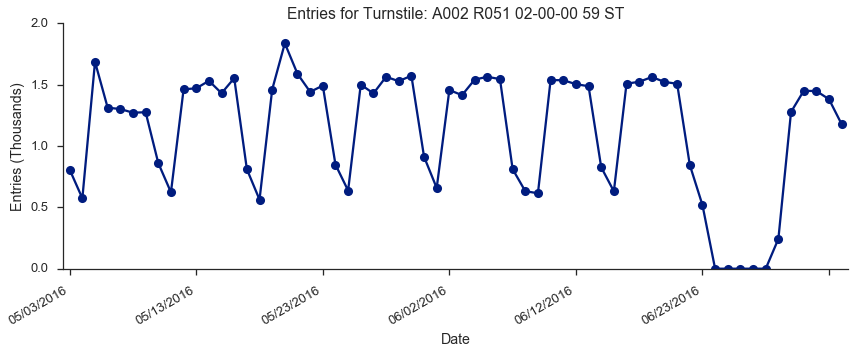

In [105]:
def fix_xlim(ax, nudge=0.5):
    xlim = ax.get_xlim()
    ax.set_xlim(xlim[0]-nudge, xlim[1]+nudge)
    return

def scale_ticklabels(x, p):
    return "%.1f" % (x / (10 ** scale_pow))

pos = pd_timeseries.index[0]
ax = pd_timeseries.loc[pos].plot('DATE', 'ENTRIES',
                                 kind='line', marker='o', ls='-',
                                 figsize=(12,5), legend=False)

fix_xlim(ax)
ax.set_xlabel('Date')

scale_pow = 3
ax.get_yaxis().set_major_formatter(FuncFormatter(scale_ticklabels))
ax.set_ylabel('Entries (Thousands)')

ax.set_title('Entries for Turnstile: ' + ' '.join(pos))
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
sns.despine()

## Question 5

Rollup data by control area and date.

In [117]:
pd_timeseries['DATE'] = pd_timeseries.DATE_TIME.dt.date

pd_timeseries_by_ca = ( pd_timeseries
                        .reset_index()
                        [['C/A', 'UNIT', 'STATION', 'DATE', 'ENTRIES']]
                        .groupby(['C/A', 'UNIT', 'STATION', 'DATE'])
                        .sum()
                        .reset_index(level=-1)
                       )

pd_timeseries_by_ca.head(n=10)

DATE  ENTRIES
C/A  UNIT STATION                     
A002 R051 59 ST    2016-04-23    10394
          59 ST    2016-04-24     8570
          59 ST    2016-04-25    16618
          59 ST    2016-04-26    16889
          59 ST    2016-04-27    17277
          59 ST    2016-04-28    17297
          59 ST    2016-04-29    16598
          59 ST    2016-04-30    11818
          59 ST    2016-05-01     8733
          59 ST    2016-05-02    17040

## Question 6

Rollup data by station and date.

In [118]:
pd_timeseries_by_station_date = ( pd_timeseries
                            .reset_index()
                            [['STATION', 'DATE', 'ENTRIES']]
                            .groupby(['STATION', 'DATE'])
                            .sum()
                            .reset_index(level=-1)
                           )

pd_timeseries_by_station_date.head(n=10)

,DATE,ENTRIES
STATION,,
1 AV,2016-04-23,19441
1 AV,2016-04-24,15811
1 AV,2016-04-25,20761
1 AV,2016-04-26,21686
1 AV,2016-04-27,22780
1 AV,2016-04-28,22558
1 AV,2016-04-29,23315
1 AV,2016-04-30,20367
1 AV,2016-05-01,14605


## Question 7

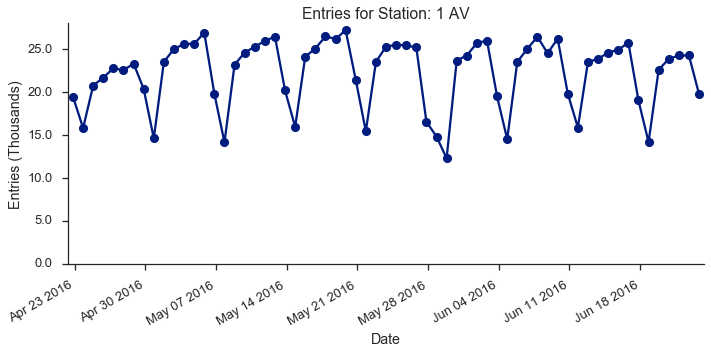

In [140]:
pos = pd_timeseries_by_station_date.index[0]
ax = pd_timeseries_by_station_date.loc[pos].plot('DATE', 'ENTRIES',
                                            kind='line',
                                            marker='o', ls='-',
                                            figsize=(10,5), legend=False)

fix_xlim(ax)
ax.set_xlabel('Date')

ax.set_ylim(0, ax.get_ylim()[1])
scale_pow = 3
ax.get_yaxis().set_major_formatter(FuncFormatter(scale_ticklabels))
ax.set_ylabel('Entries (Thousands)')

ax.set_title('Entries for Station: ' + pos)
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
sns.despine()

## Question 8

Rollup data for a single station by day of week.

In [120]:
pd_timeseries['DAY'] = pd_timeseries.DATE_TIME.dt.dayofweek
pd_timeseries['WEEK'] = pd_timeseries.DATE_TIME.dt.weekofyear

pd_timeseries_59th_by_day =    ( pd_timeseries
                                .reset_index(level=[0,1,2], drop=True)
                                .query('STATION=="59 ST"')
                                [['WEEK', 'DAY', 'DATE', 'ENTRIES']]
                                .groupby(['WEEK', 'DAY'])
                                .agg({'DATE':min, 'ENTRIES':sum})
                                )

pd_timeseries_59th_by_day.head(n=10)

DATE  ENTRIES
WEEK DAY                     
16   5    2016-04-23    46266
     6    2016-04-24    37759
17   0    2016-04-25    75790
     1    2016-04-26    77998
     2    2016-04-27    80195
     3    2016-04-28    79116
     4    2016-04-29    74877
     5    2016-04-30    49007
     6    2016-05-01    33343
18   0    2016-05-02    79519

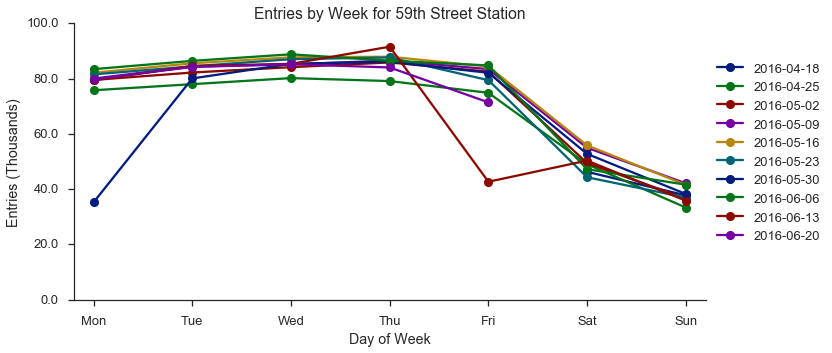

In [143]:
fig = plt.figure()
fig.set_size_inches(10,5)
ax = plt.axes()

_  = ( pd_timeseries_59th_by_day
      .reset_index(level=-1)
      .groupby(level=0)
      .plot('DAY', 'ENTRIES', 
            kind='line', marker='o', ls='-', 
            label='DATE', ax=ax)
      )

fix_xlim(ax, 0.2)
ax.set_xlabel('Day of Week')

ax.set_ylim(0, ax.get_ylim()[1])
scale_pow = 3
ax.get_yaxis().set_major_formatter(FuncFormatter(scale_ticklabels))
ax.set_ylabel('Entries (Thousands)')

ax.set_title('Entries by Week for 59th Street Station')
ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Fix the legend dates

# First week doesn't start on Sunday, must calculate that date
def plot_week(x):
    return x.min() - dt.timedelta(days=x.min().weekday())

date_labels = ( pd_timeseries_59th_by_day
               .reset_index()
               [['WEEK','DATE']]
               .groupby(['WEEK'])
               .agg(plot_week)
               .DATE
               .values
               )

legend = ax.legend(bbox_to_anchor=(1.2, 0.9))
_ = [x[1].set_text(date_labels[x[0]]) for x in enumerate(legend.get_texts())]

plt.tight_layout()
sns.despine()

## Question 9

In [144]:
pd_timeseries_by_station = ( pd_timeseries
                            .reset_index()
                            [['STATION', 'ENTRIES']]
                            .groupby('STATION')
                            .sum()
                            .sort_values('ENTRIES', ascending=False)
                           )

pd_timeseries_by_station.head(n=10)

,ENTRIES
STATION,
34 ST-PENN STA,9383171
GRD CNTRL-42 ST,8020275
34 ST-HERALD SQ,6715117
23 ST,6311575
86 ST,6159677
14 ST-UNION SQ,6082710
TIMES SQ-42 ST,5482283
42 ST-PORT AUTH,5272600
59 ST,4450915


## Question 10

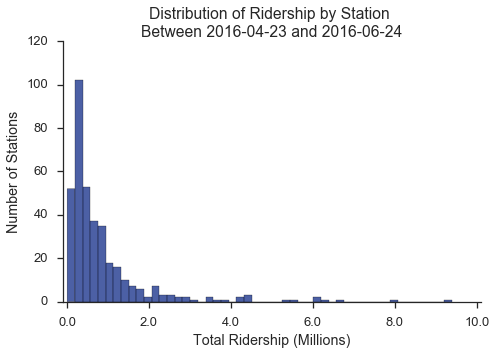

In [152]:
ax = pd_timeseries_by_station.ENTRIES.hist(bins=50, figsize=(7,5), alpha=0.7)

min_date = pd_timeseries.DATE.min()
max_date = pd_timeseries.DATE.max()

ax.grid('off')

fix_xlim(ax, 1e5)
scale_pow = 6
ax.get_xaxis().set_major_formatter(FuncFormatter(scale_ticklabels))
ax.set_xlabel('Total Ridership (Millions)')

ax.set_ylabel('Number of Stations')
ax.set_title('Distribution of Ridership by Station \nBetween {} and {}'
             .format(min_date, max_date))

plt.tight_layout()
sns.despine()

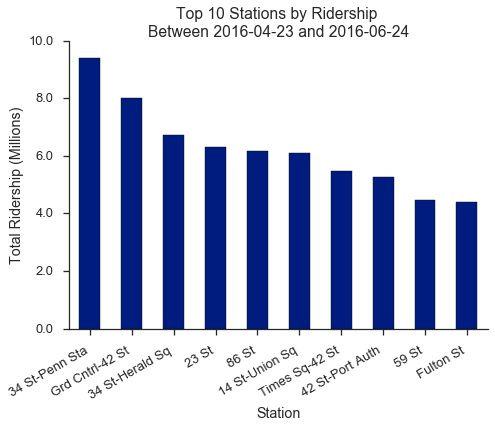

In [150]:
n_stations = 10

ax = ( pd_timeseries_by_station
       .head(n=n_stations)
       .reset_index()
       .plot('STATION', 'ENTRIES',
             kind='bar', figsize=(7,6), 
             legend=False)
      )

ax.set_xlabel('Station')

scale_pow = 6
ax.get_yaxis().set_major_formatter(FuncFormatter(scale_ticklabels))
ax.set_ylabel('Total Ridership (Millions)')

ax.set_title('Top {} Stations by Ridership \nBetween {} and {}'
             .format(n_stations, min_date, max_date))
plt.xticks(rotation=30, ha='right')

ax.set_xticklabels(map(lambda x: x.get_text().title(), ax.get_xticklabels()))

plt.tight_layout()
sns.despine()